In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
train = pd.read_csv("train.csv").drop(columns = ['Survived'])
test  = pd.read_csv("train.csv")

In [4]:
final_df = pd.concat([train,test]).sample(1309)

In [6]:
pop = final_df['Age'].dropna()

In [7]:
pop_mean = 35

In [8]:
sample_age = pop.sample(25).values

In [9]:
sample_age

array([17. , 28.5, 39. ,  3. , 44. , 30. , 56. , 50. , 35. , 19. , 24. ,
       41. , 21. , 26. , 31. , 28. , 30. , 25. , 34. , 43. , 36. , 22. ,
       30. , 54. , 23. ])

# #Single Sample t-test 

## H<sub>0</sub> ==> The mean age is 35
## H<sub>1</sub> ==> The mean age is less than 35

In [14]:
# check for normality using shapiro wilk test
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)
print(shapiro_age)

ShapiroResult(statistic=0.9742773313871282, pvalue=0.7538006610107229)


### Here we got p-value from shapiro wilk test
### and here p > 0.05 that means the data is normal
### and if p < 0.05 that means the data is not normal

In [17]:
# Direct function to calculate the t-test
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(sample_age, pop_mean)

print('t-statistic:',t_statistic)
print('p-value:',p_value/2)   # Dividing by 2 because it is a One-tailed test --> H1 > 35

t-statistic: -1.409816899860755
p-value: 0.08571092705289059


## Now since the p-value is less than the significance value(alpha = 0.05) then the Null Hypothesis is Wrong

In [18]:
alpha = 0.05

if p_value < alpha:
  print('Null Hypothesis is Rejected!')
else:
  print('Failed to reject the Null Hypothesis!')

Failed to reject the Null Hypothesis!


# Proof !!!!

In [19]:
# Checking the population mean
print(pop.mean())

30.123927550047664


### So the above Output proves that the Population Mean is less than the 35 and Hence it is in favour of Alternative Hypothesis (H1)

# #Independent two-sample t-test

### Suppose a website owner claims that there is no difference in the avg of time spent on their web betn Desktop and Mobile users. TO test this claims , we collect data from 30 desktop users and 30 mobile users regarding the time spent on the web in minutes. The sample satistics are as following:

### Hypothesis Setting
### H<sub>0</sub> : Mean(Desktop) = Mean(Mobile)
### H<sub>1</sub> : Mean(Desktop) != Mean(Desktop)

In [20]:
# Checking the normality of the Data
from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12,15,18,16,20,17,14,22,19,21,23,18,25,17,16,24,20,19,22,18,15,14,23,16,12,21,19,17,20,14]
mobile_users = [10,12,14,13,16,15,11,17,14,16,18,14,20,15,14,19,16,15,17,14,12,11,18,15,10,16,15,13,16,11]

#perform the shapiro test for both desktip and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print('Shapiro-Wilk test fo desktop users:',shapiro_desktop)
print('Shapiro-Wilk test for mobile users:',shapiro_mobile)

Shapiro-Wilk test fo desktop users: ShapiroResult(statistic=0.9783115512411942, pvalue=0.7791003299808725)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714355768676655, pvalue=0.5791606602037616)


In [21]:
# Now checking the Equality of Variance
from scipy.stats import levene

levene_test = levene(desktop_users,mobile_users )
print(levene_test)

LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741761)


### >If p-value of Lavene test is less than the alpha = 0.05 then variance of Grp A != Grp B
### >If p-value of Lavene test is greater than the alpha = 0.05 then variance of Grp A = Grp B
### # In our p-value = 0.915 >> 0.05 hence, Variance of Desktop Users = Varince of Mobile Users and thus the Equality of Variance is Valid!!!

In [22]:
from scipy.stats import t

# set the t-value and degrees of freedom
t_value = -5.25

df = 58 #(degree of freedom for two - sample t-test is df = n1 + n2 -2)

# Calculate the C.D.F value
cdf_value = t.cdf(t_value,df)
print(cdf_value*2)

2.256369746933224e-06


### The area is 2.256369746933224e-06 which is very small thus we can reject the Null Hypothesis (H0)

## Let's take an example of Avg of Male and Avg of Female cols from titanic dataset

In [23]:
pop_male = final_df[final_df['Sex'] =='male']['Age'].dropna()
pop_female = final_df[final_df['Sex'] == 'female']['Age'].dropna()

In [24]:
sample_male = pop_male.sample(25)
sample_female = pop_female.sample(25)

### H<sub>0</sub> : Mean(Males) == Mean(Females)
### H<sub>1</sub> : Mean(Males) != Mean(Females)

### >Significance Value (alpha) = 0.05

In [25]:
#Normality Test
shapiro_male = shapiro(sample_male)
shapiro_female = shapiro(sample_female)
print(shapiro_male)
print(shapiro_female)

ShapiroResult(statistic=0.9601744326923954, pvalue=0.41796030775559334)
ShapiroResult(statistic=0.9455417011273963, pvalue=0.1985501657000351)


### Both are greater than 0.05 thus it follows the Normality

In [26]:
# Equality Variance by Levene test

levene_tst = levene(sample_male,sample_female)
print(levene_tst)

LeveneResult(statistic=0.31096138896087033, pvalue=0.5796823541647168)


### p-value for levene test is greater than 0.05 thus it follows Equality Variance

In [27]:
# Now perform the t-test for two sample independent 
t_statistic1,p_value1 = stats.ttest_ind(sample_male,sample_female)

print('t-statistic:', t_statistic1)
print('p-value:',p_value1/2)

t-statistic: 3.329315765058652
p-value: 0.0008394392423777447


### Since the p-value is greater than 0.05 it means we failed to reject the Null Hypothesis

In [28]:
# Proof!!!
pop_male.mean()

31.173274596182086

In [29]:
pop_female.mean()

28.182065217391305

# It is almost similar

# Paired two sample test (dependent)

In [38]:
import matplotlib.pyplot as plt

In [39]:
before = np.array([80,92,75,68,85,78,73,90,70,88,76,84,82,77,91])
after = np.array([78,93,81,67,88,76,74,91,69,88,77,81,80,79,88])

In [40]:
differences = after - before

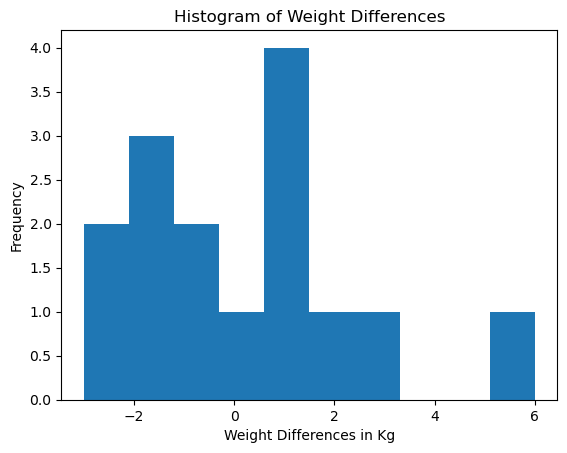

Shapiros-Wilk test: ShapiroResult(statistic=0.9220571486009436, pvalue=0.20704778986900568)


In [42]:
plt.hist(differences)
plt.title('Histogram of Weight Differences')
plt.xlabel('Weight Differences in Kg')
plt.ylabel('Frequency')
plt.show()

shapiro_test = stats.shapiro(differences)
print('Shapiros-Wilk test:',shapiro_test)

### Since the p-value 0f Shapiro-wilk test is 0.2070 > 0.05 thus it follows the normal distribution

In [44]:
mean_diff = np.mean(differences)
std_dev_diff = np.std(differences,ddof = 1)

In [47]:
n = len(differences)
t_statistic =(mean_diff)/(std_dev_diff/np.sqrt(n))
df = n-1

In [48]:
t_statistic

0.10482848367219182

In [49]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic,df)

In [50]:
p_value

0.5410005146857456

## Here p-value > 0.05 that means we failed to reject the Null Hypothesis and that means weight before is not greater than weight after that not all people did the weight reduction....
### > That does not means Null Hypothesis (Weight Before == Weight After) is purely true it's just we cannot reject it...